In [ ]:
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

: 

: 

In [3]:
#data prepocessing 

datas= pd.read_csv('diabetes.csv')
datas.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data=datas.loc[(datas['Glucose']!=0) & (datas['Age']!=0) & datas['BMI']!=0]
#df = datas.loc[[‘a’] != 0]
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
Y=data['Outcome']
#data.head()
X=data.drop('Outcome',axis=1)

USING KNN

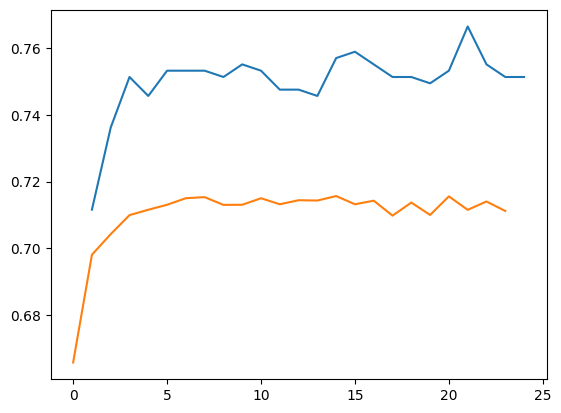

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
number=[]
score_max=[]
score_mean=[]
for i in range(1,25):
    scoree=0
    score_f=[]
    for j in range(100):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=.3)
        model=KNeighborsClassifier(n_neighbors=i)
        model.fit(x_train,y_train)
        scoret=model.score(x_test,y_test)
        scoree=max(scoree, scoret )
        score_f.append(scoret)
        
    number.append(i)
    score_max.append(scoree)
    score_mean.append(np.mean(score_f))

plt.plot(number,score_max,score_mean)
plt.show()

In [52]:
#build the model with 8 neigbors
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.7115749525616698

,LETS BUILD A NEURAL NETWORK

In [ ]:
model_nn=tf.keras.Sequential([
    tf.keras.layers.Dense(units=30,activation='relu',name='L1'),
    tf.keras.layers.Dense(units=50,activation='relu',name='L2'),
     tf.keras.layers.Dense(units=50,activation='softmax',name='L3'),
    tf.keras.layers.Dense(units=1,activation='sigmoid',name='L5')
        ])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_nn.fit (x_train, y_train, epochs = 150, batch_size = 32)


In [71]:
model_nn.evaluate(x_test,y_test)

17/17 [==============================] - 0s 2ms/step - loss: 0.6895 - accuracy: 0.6983


[0.6895363926887512, 0.6982921957969666]

USE FEATURE SCALLING 
AND GRIDSEARCHCV IN KNN